In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import KFold,LeaveOneOut,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE,RFECV
from mlxtend.feature_selection import SequentialFeatureSelector
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',50)

In [2]:
insurance=pd.read_csv('Insurance_train (1).csv')
insurance.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
insurance.shape

(58592, 44)

In [284]:
# Univarainte analysis
insurance.select_dtypes(include=np.number).columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [285]:
num=['policy_tenure', 'age_of_car', 'age_of_policyholder','population_density','displacement',\
 'turning_radius', 'length', 'width', 'height','gross_weight']

len(num)

10

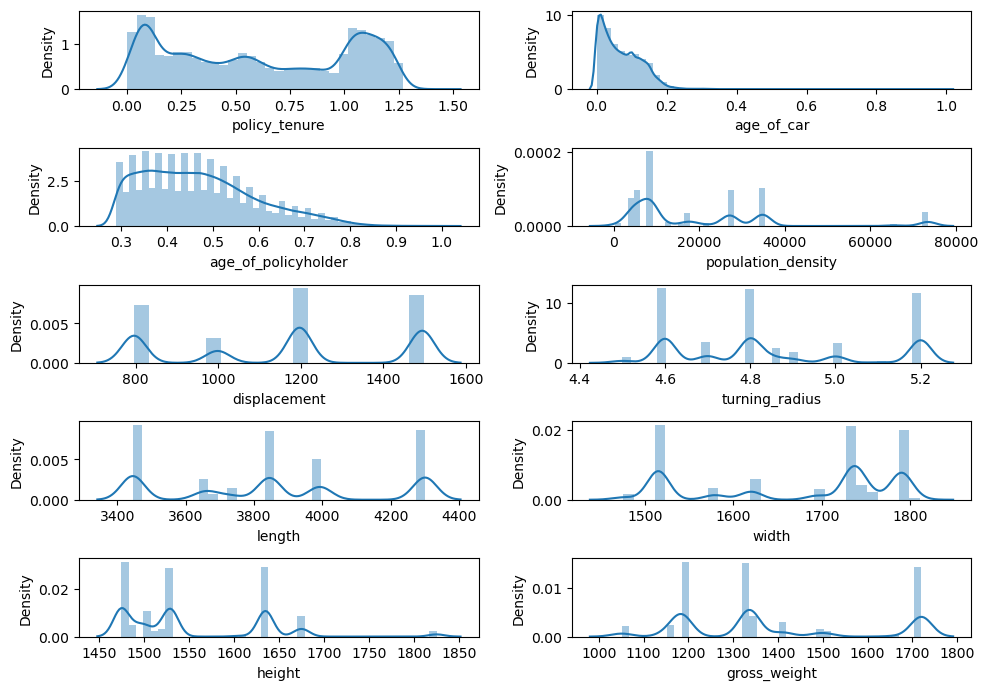

In [286]:
nrows=5
ncols=2
iterator=1
plt.figure(figsize=(10,7))
for i in num:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(insurance.loc[:,i])
    iterator+=1
plt.tight_layout()
plt.show()

In [287]:
insurance.select_dtypes(include='object').columns

cats=['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert','make','airbags','cylinder','is_claim','ncap_rating']

len(cats)

30

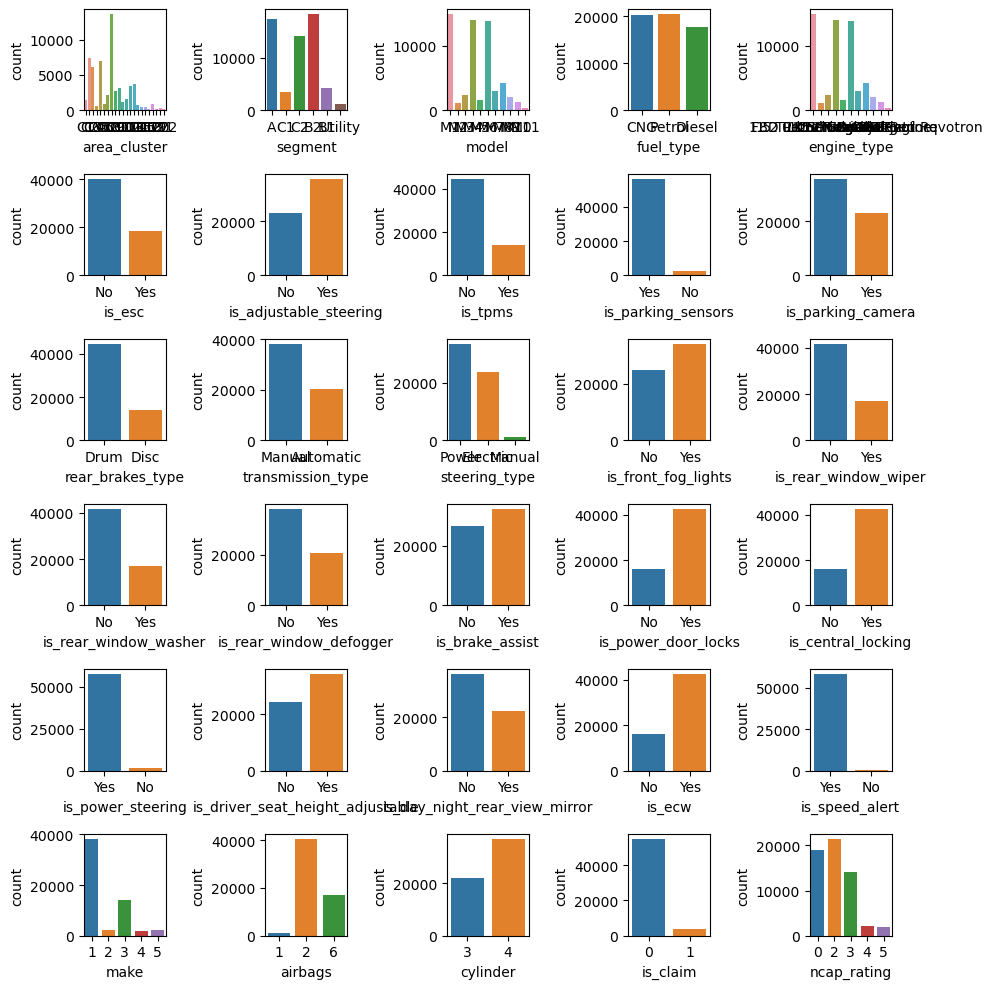

In [288]:
nrows=6
ncols=5
iterator=1
plt.figure(figsize=(10,10))
for i in cats:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(x=i,data=insurance)
    iterator+=1
plt.tight_layout()
plt.show()

<Axes: xlabel='is_claim', ylabel='count'>

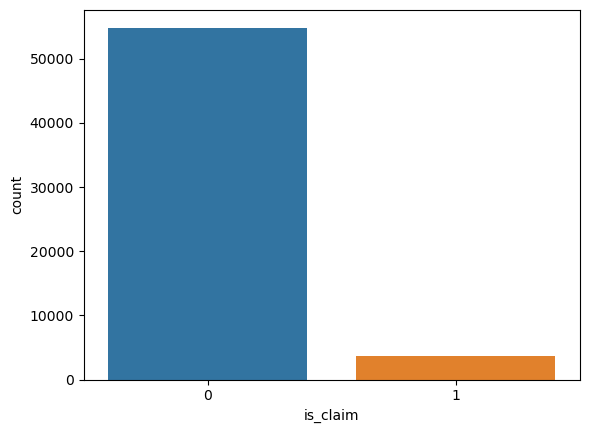

In [289]:
sns.countplot(x='is_claim',data=insurance)

In [290]:
insurance.is_claim.value_counts(normalize=True)

is_claim
0    0.936032
1    0.063968
Name: proportion, dtype: float64

<Axes: xlabel='area_cluster', ylabel='count'>

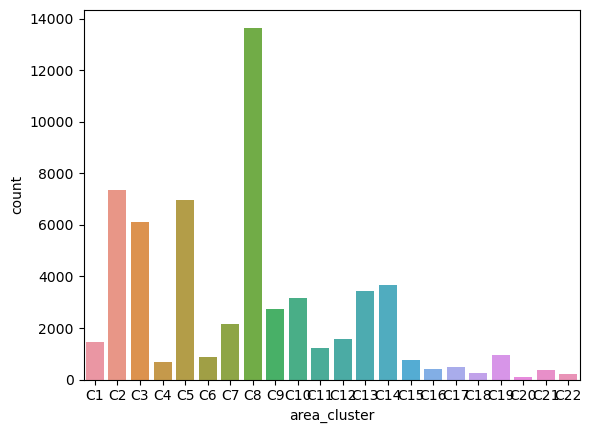

In [291]:
sns.countplot(x='area_cluster',data=insurance)

# Top 3 cluster are C8, C5, C2

<Axes: xlabel='area_cluster'>

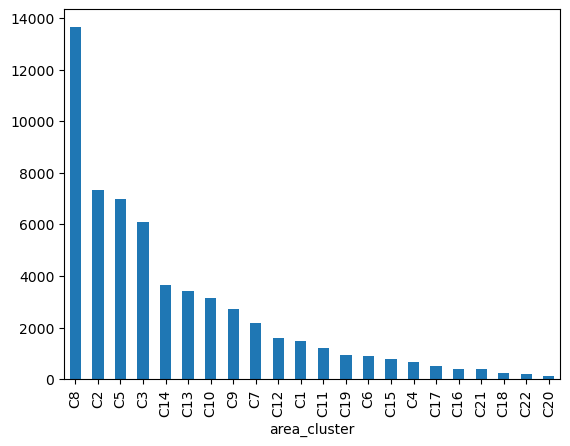

In [292]:
insurance.area_cluster.value_counts().plot(kind='bar')


<Axes: xlabel='model'>

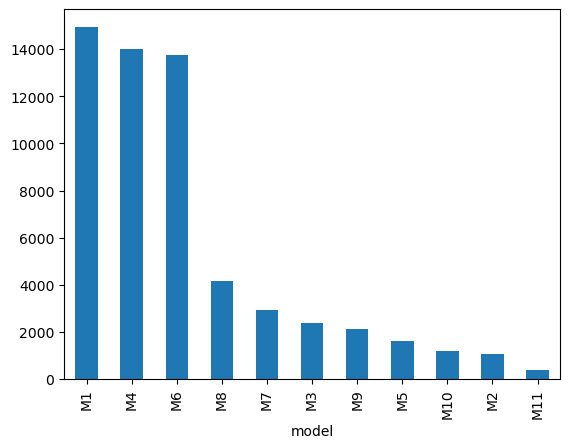

In [293]:
# sns.countplot(x='model',data=insurance)

insurance.model.value_counts().plot(kind='bar')

# Top 3 model of cars are M1, M4, M6

In [294]:
insurance.model.value_counts()[:3].index

Index(['M1', 'M4', 'M6'], dtype='object', name='model')

In [295]:
# Segment
insurance.segment.value_counts()[:3].index

# Top 3 segment are B2 , A, C2

Index(['B2', 'A', 'C2'], dtype='object', name='segment')

In [296]:
# Segment
insurance.engine_type.value_counts()[:3].index

# Top 3 enginetype are B2 , A, C2

Index(['F8D Petrol Engine', '1.5 L U2 CRDi', 'K Series Dual jet'], dtype='object', name='engine_type')

<Axes: xlabel='engine_type'>

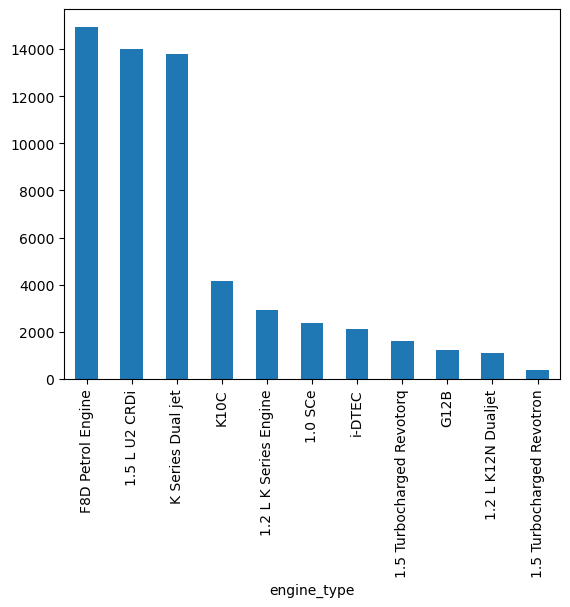

In [297]:
insurance.engine_type.value_counts().plot(kind='bar')


In [298]:
# ncap_rating
insurance.ncap_rating.value_counts()[:3].index

# Top 3 enginetype are B2 , A, C2

Index([2, 0, 3], dtype='int64', name='ncap_rating')

<Axes: xlabel='ncap_rating'>

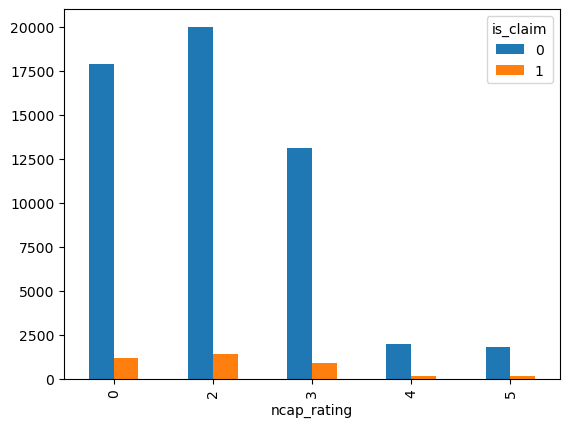

In [299]:
pd.crosstab(insurance.ncap_rating,insurance.is_claim).plot(kind='bar')

# Lower the NCAP rating more chances of a claim coming to insurance co

In [300]:
insurance.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

### Feature Engg.

In [301]:
insurance.head(1)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0


In [302]:
int(insurance['max_torque'][0].split('Nm')[0])

60

In [303]:
torque=[]
for i in insurance['max_torque']:
    torque.append(i.split('Nm')[0])

In [304]:
insurance['Nm']=pd.to_numeric(pd.Series(torque))

In [305]:
torque=[]
for i in insurance['max_torque']:
    torque.append(i.split('Nm')[0])

In [306]:
rpm=[]
for i in insurance['max_torque']:
    rpm.append(i.split('@')[1].split('rpm')[0])
    
insurance['rpm']=pd.to_numeric(pd.Series(rpm))

In [307]:
bhp=[]
for i in insurance['max_power']:
    bhp.append(i.split('bhp')[0])
insurance['bhp']=pd.to_numeric(pd.Series(rpm))

In [308]:
rpm=[]
for i in insurance['max_power']:
    rpm.append(i.split('@')[1].split('rpm')[0])
    
insurance['rpm_power']=pd.to_numeric(pd.Series(rpm))

In [309]:
cols=['is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert','is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera','is_esc']

labels={'Yes':1,'No':0}
for i in cols:
    insurance.loc[:,i]=insurance.loc[:,i].map(labels)

In [310]:
insurance

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm,rpm,bhp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,0,0,0,1,0,0,60.0,3500,3500,6000
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,0,0,0,1,0,0,60.0,3500,3500,6000
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,0,0,0,1,0,0,60.0,3500,3500,6000
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,1,1,1,1,2,0,113.0,4400,4400,6000
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,0,1,1,1,2,0,91.0,4250,4250,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,0,1,1,1,2,0,91.0,4250,4250,5500
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,0,0,0,1,0,0,60.0,3500,3500,6000
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,0,0,0,1,0,0,60.0,3500,3500,6000
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,1,1,1,1,2,0,113.0,4400,4400,6000


In [311]:
# drop some of variables......
insurance.drop(['policy_id','max_torque','max_power'],axis=1,inplace=True)

In [312]:
insurance.shape

(58592, 45)

In [313]:
insurance.displacement.unique()

# <=1000 Underpower
# <=1200 Power
# > More power

array([ 796, 1197,  999, 1493, 1497,  998, 1498, 1196, 1199])

In [314]:
def power(x):
    if x<=1000:
        return('small_engine')
    elif x<=1200:
        return('med_engine')
    else:
        return('high_power_engine')
    
insurance['disp_bin']=insurance.displacement.apply(power)

In [315]:
insurance.drop('engine_type',axis=1,inplace=True)

In [316]:
insurance.area_cluster.unique()

array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22'], dtype=object)

In [317]:
area=['C1', 'C3', 'C4', 'C6', 'C7', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22']
def areas(x):
    if x in area:
        return('Others')
    else:
        return(x)
insurance.loc[:,'area_cluster']=insurance.area_cluster.apply(areas)

In [318]:
insurance.area_cluster.value_counts()

area_cluster
Others    30617
C8        13654
C2         7342
C5         6979
Name: count, dtype: int64

In [319]:
insurance.model.value_counts()[:3].index

Index(['M1', 'M4', 'M6'], dtype='object', name='model')

In [320]:
model=['M2', 'M3', 'M5', 'M7', 'M8', 'M9', 'M10', 'M11']
def models(x):
    if x in model:
        return('Others')
    else:
        return(x)
insurance.loc[:,'model']=insurance.model.apply(models)

In [321]:
insurance.model.unique()

array(['M1', 'Others', 'M4', 'M6'], dtype=object)

In [322]:
insurance.segment.value_counts()[:3].index

Index(['B2', 'A', 'C2'], dtype='object', name='segment')

In [323]:
insurance.segment.unique()

array(['A', 'C1', 'C2', 'B2', 'B1', 'Utility'], dtype=object)

In [324]:
segment=['C1','B1', 'Utility']
def segments(x):
    if x in segment:
        return('Others')
    else:
        return(x)
insurance.loc[:,'segment']=insurance.segment.apply(models)

In [325]:
dummy=pd.get_dummies(insurance,drop_first=True)

x=dummy.drop('is_claim',axis=1)
y=dummy.is_claim

In [326]:
x = x.astype(int)

In [327]:
x

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,is_brake_assist_1,is_power_door_locks_1,is_central_locking_1,is_power_steering_1,is_driver_seat_height_adjustable_1,is_day_night_rear_view_mirror_1,is_ecw_1,is_speed_alert_1,disp_bin_med_engine,disp_bin_small_engine
0,0,0,0,4990,1,2,796,3,5,4,...,0,0,0,1,0,0,0,1,0,1
1,0,0,0,27003,1,2,796,3,5,4,...,0,0,0,1,0,0,0,1,0,1
2,0,0,0,4076,1,2,796,3,5,4,...,0,0,0,1,0,0,0,1,0,1
3,0,0,0,21622,1,2,1197,4,5,4,...,1,1,1,1,1,1,1,1,1,0
4,0,0,0,34738,2,2,999,3,5,5,...,0,1,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0,0,0,8794,2,2,999,3,5,5,...,0,1,1,1,0,1,1,1,0,1
58588,1,0,0,7788,1,2,796,3,5,4,...,0,0,0,1,0,0,0,1,0,1
58589,1,0,0,34738,1,2,796,3,5,4,...,0,0,0,1,0,0,0,1,0,1
58590,1,0,0,8794,1,2,1197,4,5,4,...,1,1,1,1,1,1,1,1,1,0


In [328]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [329]:
logreg=LogisticRegression()
gnb=GaussianNB()

# Fit it on Train and test
pred_train_lg=logreg.fit(xtrain,ytrain).predict(xtrain)
pred_test_lg=logreg.fit(xtrain,ytrain).predict(xtest)

# Fit it on Train and test
pred_train_gnb=gnb.fit(xtrain,ytrain).predict(xtrain)
pred_test_gnb=gnb.fit(xtrain,ytrain).predict(xtest)

In [330]:
from sklearn.metrics import accuracy_score,classification_report

print('LogReg Train Acc: ',accuracy_score(ytrain,pred_train_lg))
print('LogReg Test Acc: ',accuracy_score(ytest,pred_test_lg))

print('GNB Train Acc: ',accuracy_score(ytrain,pred_train_gnb))
print('GNB Test Acc: ',accuracy_score(ytest,pred_test_gnb))

LogReg Train Acc:  0.9351225652294498
LogReg Test Acc:  0.939670620360099
GNB Train Acc:  0.9351225652294498
GNB Test Acc:  0.939670620360099


### Precision and Recall
* Precision is the ratio of currently predicted positive class to the total positive. It defined as (TP/TP+FP)

* Recall aka Sensitivity and True Postive Rate. It is the ratio of correctly predicted **Positive observation to all the obseravtions to all the obseravtions**.(TP/TP+FN)

NOTE: Precision ad recall are inversely associated with each other. It means that if the precision increase, the recall will go down and vice versa

* High recall indicated that it has a very low False Negative where as High precision indicates very low False Postive

#### I need a balance of precision and recall - Harmonic Mean of P & R

* Harmonic Mean of precision and recall it called F1 Score.

* While seeking balance between Precision and Recall, we can use a metric known as **F1 Score**.

In [331]:
# Classification Report - Precision, Recall and F1 Score

print(classification_report(ytest,pred_test_lg))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11012
           1       0.00      0.00      0.00       707

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719



<Axes: >

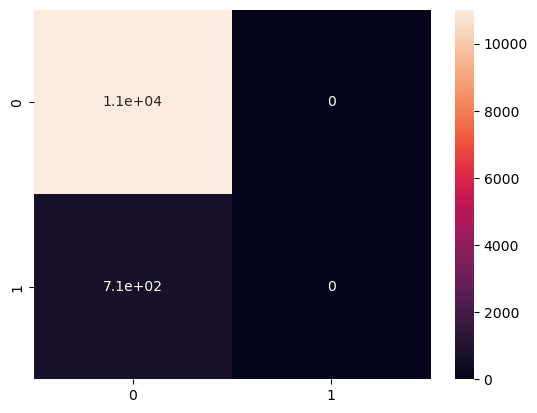

In [332]:
from sklearn.metrics import confusion_matrix, f1_score

sns.heatmap(confusion_matrix(ytest,pred_test_lg),annot=True)

In [333]:
print('F1_Score',f1_score(ytest,pred_test_lg))

# Predicting for Class 1.....


F1_Score 0.0


### SMOTE - Handling Imbalance Dataset

* Synthetic Minority Oversampling Technique - This is an oversampling strategy. It means we will try to synthetically generated more data for the minority call.

* This way the imbalanced will be reduaced upto certain extent and thus the model will be able to capture the precision and recall of minority class.

* Such models are genralised models as they are able to control the overfitting where in only majority class gets more weightage and model predicteds only that class.

In [334]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [335]:
from imblearn.over_sampling import SMOTE

In [336]:
smote= SMOTE(sampling_strategy='minority',random_state=0)

In [337]:
# recreate the new samples

X_resampled,y_resampled=smote.fit_resample(x,y)

In [338]:
print('y: ',y.value_counts())
print('y_Smote: ',y_resampled.value_counts())

y:  is_claim
0    54844
1     3748
Name: count, dtype: int64
y_Smote:  is_claim
0    54844
1    54844
Name: count, dtype: int64


In [339]:
xtrain, xtest, ytrain, ytest = train_test_split(X_resampled,y_resampled,random_state=42,test_size=0.20)

In [340]:
lg = LogisticRegression()

pred = lg.fit(xtrain,ytrain).predict(xtest)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.53      0.41      0.46     11092
           1       0.51      0.63      0.56     10846

    accuracy                           0.52     21938
   macro avg       0.52      0.52      0.51     21938
weighted avg       0.52      0.52      0.51     21938



In [341]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()

pred = gbm.fit(xtrain,ytrain).predict(xtest)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.56      0.63      0.59     11092
           1       0.57      0.50      0.53     10846

    accuracy                           0.56     21938
   macro avg       0.57      0.56      0.56     21938
weighted avg       0.57      0.56      0.56     21938



In [342]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=123,max_depth=4)
pred = dtree.fit(xtrain,ytrain).predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.55      0.66      0.60     11092
           1       0.56      0.44      0.50     10846

    accuracy                           0.55     21938
   macro avg       0.56      0.55      0.55     21938
weighted avg       0.56      0.55      0.55     21938



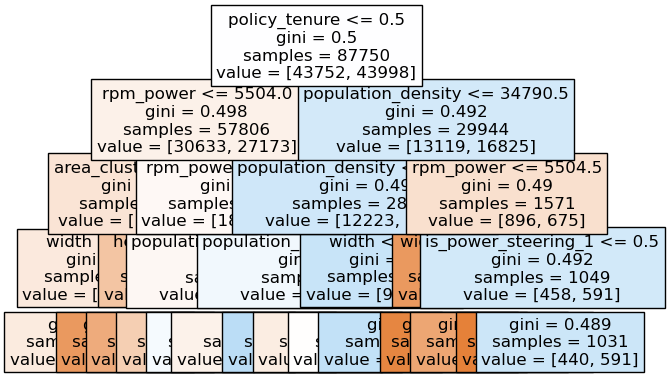

In [343]:
# plot the decision tree

from sklearn.tree import plot_tree

output=plot_tree(dtree,feature_names=xtrain.columns,filled=True,fontsize=12)


### Pruning

In [344]:
# List of Parameters

params=[{'max_depth':[3,5,7,9,11,14,15,20],'max_features':[None,'sqrt','auto']\
         ,'min_sample_split':[5000,1000,12000,15000]}]

In [345]:
from sklearn.model_selection import RandomizedSearchCV

tree= DecisionTreeClassifier(random_state=123)

search= RandomizedSearchCV(estimator=tree,param_distributions=params,cv=5,random_state=123,scoring='recall')

In [353]:
# Fit the model.....
model=search.fit(X_resampled,y_resampled)

ValueError: Invalid parameter 'min_sample_split' for estimator DecisionTreeClassifier(random_state=123). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'].

In [ ]:
model.best_params_

In [348]:
dtree= DecisionTreeClassifier(random_state=123,max_depth=4)

pred=dtree.fit(xtrain,ytrain).predict(xtest)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.55      0.66      0.60     11092
           1       0.56      0.44      0.50     10846

    accuracy                           0.55     21938
   macro avg       0.56      0.55      0.55     21938
weighted avg       0.56      0.55      0.55     21938



In [349]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, pred)

#. kappa Score is 52% which means odel is a good model

0.1069336858461164

In [352]:
pred= dtree.fit(x,y).predict(x)
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     54844
           1       0.00      0.00      0.00      3748

    accuracy                           0.94     58592
   macro avg       0.47      0.50      0.48     58592
weighted avg       0.88      0.94      0.91     58592



In [357]:
# Naive bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
pred=gnb.fit(xtrain,ytrain).predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.53      0.56      0.54     11092
           1       0.52      0.50      0.51     10846

    accuracy                           0.53     21938
   macro avg       0.53      0.53      0.53     21938
weighted avg       0.53      0.53      0.53     21938

